## VGG 16 on CIFAR dataset 

    Essentially VGG16 seems to be struggling quite badly on UCF101 spatial data set. Its stayed at 1% for 5 epochs which is effectively a random guess. So my feeling is potentially I'm feeding in the data badly or something is terribly wrong with the model the way I've set it up. So what I aim to do is essentially using that same model feed it CIFAR 10 which there are loads of example and I should expect I'll be doing at least 60% with VGG 16 if not higher. 

In [2]:
# first lets load the data set

from cifar_dataset import data_utils
import numpy as np


# get rescaled training data and convert to data frame
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10("cifar_dataset/cifar-10-batches-py")

# Subsample the data for more efficient code execution in this exercise
num_training = 20000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 5000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test -= mean_image

# Reshape the image data into rows
print("train:", X_train.shape, y_train.shape)
print("test:", X_test.shape, y_test.shape)

train: (20000, 32, 32, 3) (20000,)
test: (5000, 32, 32, 3) (5000,)


In [2]:
# now lets create the network 

import network 


from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

def get_callbacks(filepath, patience=10):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=5)

model= network.getVggModel(1e-5,1e-1,0.9, (48,48,3), 10)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [3]:
import matplotlib.pyplot as plt
import cv2

X_train_aug = np.empty((X_train.shape[0], 48, 48, 3))
X_test_aug = np.empty((X_test.shape[0], 48, 48, 3))

b = None
for i, img in enumerate(X_train):
    X_train_aug[i] = cv2.resize(img, (48,48))
    
for i, img in enumerate(X_test):
    X_test_aug[i] = cv2.resize(img, (48,48))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


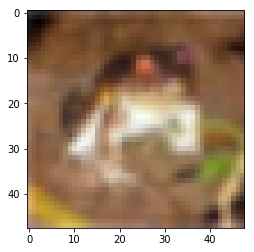

In [11]:

norm_image = cv2.normalize(X_train_aug[0], dst=None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

plt.imshow(norm_image)

In [5]:
import keras

y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)


In [6]:

keras.utils.to_categorical
mod1=model.fit(X_train_aug, y_train_cat,
          batch_size=64,
          epochs=40,
          verbose=1,
          validation_data=(X_test_aug, y_test_cat))

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 23s 1ms/step - loss: 13.5889 - acc: 0.1009 - val_loss: 4.5659 - val_acc: 0.1490
Epoch 2/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.5055 - acc: 0.1064 - val_loss: 3.7220 - val_acc: 0.2240
Epoch 3/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.4502 - acc: 0.1085 - val_loss: 3.5811 - val_acc: 0.2854
Epoch 4/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.3821 - acc: 0.1102 - val_loss: 4.0420 - val_acc: 0.2966
Epoch 5/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.3191 - acc: 0.1158 - val_loss: 4.5100 - val_acc: 0.2944
Epoch 6/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.1675 - acc: 0.1221 - val_loss: 4.5652 - val_acc: 0.3040
Epoch 7/40
20000/20000 [==============================] - 21s 1ms/step - loss: 13.0868 - acc: 0.1283 - val_loss: 4.3215 - v